In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Slice data in training and test ###

In [6]:
dataset = pd.read_csv(r'/home/admin/Área de Trabalho/AI_applied_to_5g/5G - Datasets treated/Amazon/Static/amazon_static.csv')
columns_to_fill = ['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI']
medians = dataset[columns_to_fill].median()
dataset[columns_to_fill] = dataset[columns_to_fill].fillna(medians)

In [7]:
print(dataset.columns)

Index(['Timestamp', 'Longitude', 'Latitude', 'Speed', 'Operatorname', 'CellID',
       'NetworkMode', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'State', 'PINGAVG', 'PINGMIN', 'PINGMAX', 'PINGSTDEV',
       'PINGLOSS', 'CELLHEX', 'NODEHEX', 'LACHEX', 'RAWCELLID', 'NRxRSRP',
       'NRxRSRQ'],
      dtype='object')


In [8]:
X_DL = dataset[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI']]
y_DL = dataset['DL_bitrate']

X_UL = dataset[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI']]
y_UL = dataset['UL_bitrate']


In [9]:
X_train_DL, X_test_DL, y_train_DL, y_test_DL = train_test_split(X_DL, y_DL, test_size=0.3, random_state=42)
X_train_UL, X_test_UL, y_train_UL, y_test_UL = train_test_split(X_UL, y_UL, test_size=0.3, random_state=42)

In [10]:
nan_counts = dataset.isna().sum()

print("Number of NaN values in each column:")
print(nan_counts)


Number of NaN values in each column:
Timestamp           0
Longitude           0
Latitude            0
Speed               0
Operatorname        0
CellID              0
NetworkMode         0
RSRP                0
RSRQ                0
SNR                 0
CQI                 0
RSSI                0
DL_bitrate          0
UL_bitrate          0
State               0
PINGAVG         34941
PINGMIN         34941
PINGMAX         34941
PINGSTDEV       34941
PINGLOSS        34941
CELLHEX             0
NODEHEX             0
LACHEX              0
RAWCELLID           0
NRxRSRP         14093
NRxRSRQ         14093
dtype: int64


### Linear Regression Dowload ###

In [48]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data scaling step
    ('model', LR())  # Linear Regression model step
])


In [51]:
pipeline.fit(X_train_DL, y_train_DL)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [53]:
linear_y_pred_DL_test = pipeline.predict(X_test_DL)



### Random Forest Regressor Dowload ###

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

#### Randomized Search ####

In [40]:
rf_reg = RandomForestRegressor(n_jobs=-1)


param_dist = {
    'n_estimators': randint(100, 2000)  
}

random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


random_search.fit(X_train_DL, y_train_DL)

best_n_estimators = random_search.best_params_['n_estimators']
be0st_rf_reg = random_search.best_estimator_

/home/admin/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [42]:
print(random_search.best_estimator_)
predictions_rf_reg_DL = be0st_rf_reg.predict(X_test_DL)
print(predictions_rf_reg_DL)

RandomForestRegressor(n_estimators=326, n_jobs=-1)
[2133.34856408 4898.38023283 7916.33055069 ...  995.68256646 5111.27399942
 5375.85850131]


#### Grid Search ####

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 150, 200, 300, 400 ,500, 700, 1000,1200, 1500, 1800, 2000]
}

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_DL, y_train_DL)


best_n_estimators_grid_search_DL = grid_search.best_params_['n_estimators']
best_rf_reg_grid_search = grid_search.best_estimator_


In [47]:
print(best_rf_reg_grid_search)
predictions_rf_reg_DL = best_rf_reg_grid_search.predict(X_test_DL)
print(predictions_rf_reg_DL)


RandomForestRegressor(n_estimators=150, n_jobs=-1)
[2133.68734813 4917.75341373 7844.78826984 ...  972.72       5583.4795873
 5393.21588889]


### Suporte Vector Machine Dowload ###

In [12]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/home/admin/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


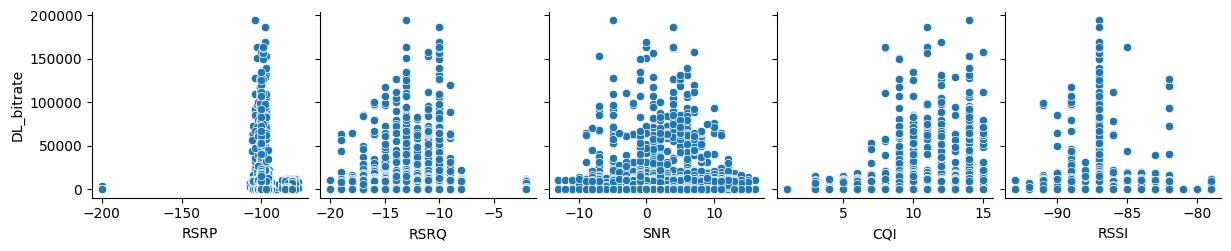

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# print(dataset.describe())  # Summary statistics

# Create pair plots to visualize relationships
sns.pairplot(dataset, x_vars=['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI'], y_vars=['DL_bitrate'], kind='scatter')
plt.show()

#### Grid Search ####

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svm_reg = SVR()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             # Range for C (regularization parameter)
    'kernel': ['linear', 'rbf', 'poly'],      # Kernel types to consider
    'gamma': [1e-4, 1e-3, 1e-2]  # Range for gamma (kernel coefficient)
}


grid_search = GridSearchCV(estimator=svm_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error' , n_jobs=-1, verbose=2)


grid_search.fit(X_train_DL, y_train_DL)

# Get the best parameters and the associated model
best_params_grid_search_DL = grid_search.best_params_
best_svm_reg_grid_search_DL = grid_search.best_estimator_



Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ................C=0.01, gamma=0.0001, kernel=linear; total time=  20.2s
[CV] END ................C=0.01, gamma=0.0001, kernel=linear; total time=  20.2s
[CV] END ..................C=0.01, gamma=0.0001, kernel=poly; total time=  20.1s
[CV] END ................C=0.01, gamma=0.0001, kernel=linear; total time=  20.4s
[CV] END ................C=0.01, gamma=0.0001, kernel=linear; total time=  20.4s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=  20.5s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=  20.5s
[CV] END ..................C=0.01, gamma=0.0001, kernel=poly; total time=  20.6s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=  20.7s
[CV] END ..................C=0.01, gamma=0.0001, kernel=poly; total time=  21.3s
[CV] END ..................C=0.01, gamma=0.0001, kernel=poly; total time=  21.4s
[CV] END .................C=0.01, gamma=0.001, 

In [31]:
best_C = best_params_grid_search_DL['C']
best_kernel = best_params_grid_search_DL['kernel']
best_gamma = best_params_grid_search_DL['gamma']
predictions_svr_grid_search_DL = best_svm_reg_grid_search_DL.predict(X_test_DL)

print(f'C : ',best_C )
print(f'kernel : ',best_kernel)
print(f'gama : ',best_gamma)
print(f'prediction : ',predictions_svr_grid_search_DL)


C :  10
kernel :  poly
gama :  0.01
prediction :  [-3870.83978056  6095.50946878  2989.19681038 ...  2437.63039393
  3946.87570361  2724.37636196]


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import scipy.stats as stats

svm_reg = SVR()

param_dist = {
    'C': stats.uniform(0.01, 99.99),         
    'kernel': ['linear', 'rbf', 'poly'],      
    'gamma': stats.loguniform(1e-4, 1e-2)    
}

random_search = RandomizedSearchCV(
    estimator=svm_reg, 
    param_distributions=param_dist, 
    n_iter=50,  # Number of iterations (samples from param_dist)
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    verbose=2
)

random_search.fit(X_train_DL, y_train_DL)

# Get the best parameters and the associated model
best_params_random_search_DL = random_search.best_params_
best_svm_reg_random_search_DL = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=20.459864818460336, gamma=0.0018692334256716584, kernel=linear; total time=  21.7s
[CV] END C=58.91995915000435, gamma=0.0018243358880172527, kernel=linear; total time=  22.4s
[CV] END C=58.91995915000435, gamma=0.0018243358880172527, kernel=linear; total time=  23.6s
[CV] END C=48.92405640231189, gamma=0.0019000674356622741, kernel=linear; total time=  24.1s
[CV] END C=48.92405640231189, gamma=0.0019000674356622741, kernel=linear; total time=  24.5s
[CV] END C=20.459864818460336, gamma=0.0018692334256716584, kernel=linear; total time=  24.8s
[CV] END C=20.459864818460336, gamma=0.0018692334256716584, kernel=linear; total time=  24.9s
[CV] END C=58.91995915000435, gamma=0.0018243358880172527, kernel=linear; total time=  25.8s
[CV] END C=58.91995915000435, gamma=0.0018243358880172527, kernel=linear; total time=  26.5s
[CV] END C=48.92405640231189, gamma=0.0019000674356622741, kernel=linear; total time=  26.9s
[CV] 

In [30]:
print(best_params_random_search_DL)
predictions_svr_random_search_DL = best_svm_reg_random_search_DL.predict(X_test_DL)
print(predictions_svr_random_search_DL)


{'C': 81.13904244983902, 'gamma': 0.00471773021982405, 'kernel': 'poly'}
[-572.98116847 1952.9616451  3273.86649248 ... 2348.08844653 2288.53856386
 -311.37631253]


### Salvar dados de teste e treino em csv ###

In [58]:
output_folder_train_and_test = r'../Training_And_Test/'
X_train_DL.to_csv(output_folder_train_and_test + '//' + 'X_train_DL.csv')
y_train_DL.to_csv(output_folder_train_and_test + '//' + 'y_train_DL.csv')
X_test_DL.to_csv(output_folder_train_and_test + '//' + 'X_test_DL.csv')
y_test_DL.to_csv(output_folder_train_and_test + '//' + 'y_test_DL.csv')

X_train_UL.to_csv(output_folder_train_and_test + '//' + 'X_train_UL.csv')
y_train_UL.to_csv(output_folder_train_and_test + '//' + 'y_train_UL.csv')
X_test_UL.to_csv(output_folder_train_and_test + '//' + 'X_test_UL.csv')
y_test_UL.to_csv(output_folder_train_and_test + '//' + 'y_test_UL.csv')
